In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/Salary_Dataset_DataScienceLovers.csv")

In [3]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [5]:
df = df.dropna()

In [6]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

df.columns


Index(['rating', 'company_name', 'job_title', 'salary', 'salaries_reported',
       'location', 'employment_status', 'job_roles'],
      dtype='object')

In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 22769 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             22769 non-null  float64
 1   company_name       22769 non-null  object 
 2   job_title          22769 non-null  object 
 3   salary             22769 non-null  int64  
 4   salaries_reported  22769 non-null  int64  
 5   location           22769 non-null  object 
 6   employment_status  22769 non-null  object 
 7   job_roles          22769 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.6+ MB


,rating,salary,salaries_reported
count,22769.000000,2.276900e+04,22769.000000
mean,3.918209,6.953656e+05,1.855813
std,0.519686,8.844124e+05,6.823816
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [8]:
df = df[df['salary'] > 0]


In [9]:
# This dataset contains job-wise salary information across Indian companies with role, location, and employment type, enabling compensation and bias analysis

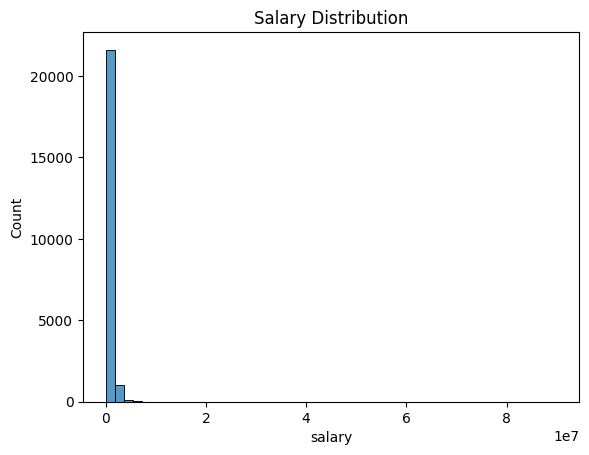

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['salary'], bins=50)
plt.title("Salary Distribution")
plt.show()

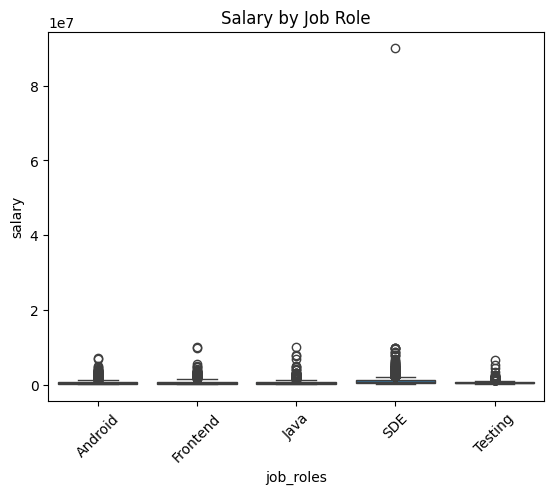

In [11]:
top_roles = df['job_roles'].value_counts().head(5).index

sns.boxplot(
    x='job_roles',
    y='salary',
    data=df[df['job_roles'].isin(top_roles)]
)
plt.xticks(rotation=45)
plt.title("Salary by Job Role")
plt.show()


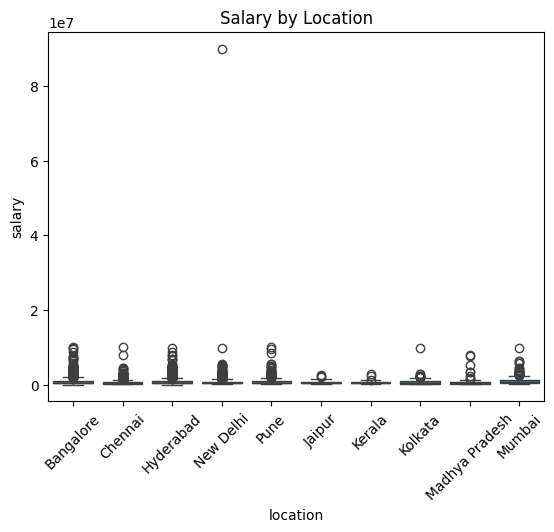

In [12]:
sns.boxplot(x='location', y='salary', data=df)
plt.xticks(rotation=45)
plt.title("Salary by Location")
plt.show()


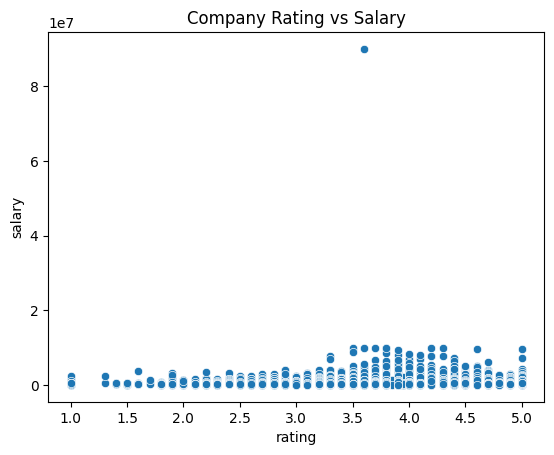

In [13]:
sns.scatterplot(x='rating', y='salary', data=df)
plt.title("Company Rating vs Salary")
plt.show()


In [14]:
# Key Findings (Day 1):

# Salary distribution is heavily skewed across roles

# Job role & location significantly impact pay

# Company rating alone does not guarantee higher salary

# Signals of location-based and role-based bias observed

In [15]:
df.head()
df.shape

(22769, 8)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt


In [17]:
le=LabelEncoder()

In [18]:
df['job_role_enc'] = le.fit_transform(df['job_roles'])

In [19]:
df['location_enc'] = le.fit_transform(df['location'])

In [20]:
df['employment_enc'] = le.fit_transform(df['employment_status'])

In [21]:
df

,rating,company_name,job_title,salary,salaries_reported,location,employment_status,job_roles,job_role_enc,location_enc,employment_enc
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,0,0,1
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,0,0,1
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,0,0,1
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,0,0,1
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web,10,0,1
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web,10,0,1
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web,10,0,1
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web,10,0,1


In [22]:
X = df[['job_role_enc', 'location_enc', 'employment_enc', 'rating']]
y = df['salary']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
model = RandomForestRegressor(
    n_estimators=150,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [25]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

r2, mae


(0.0605936997162988, 405962.73776430637)

In [26]:
import pandas as pd

importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance


,0
rating,0.324214
job_role_enc,0.279697
location_enc,0.260807
employment_enc,0.135282


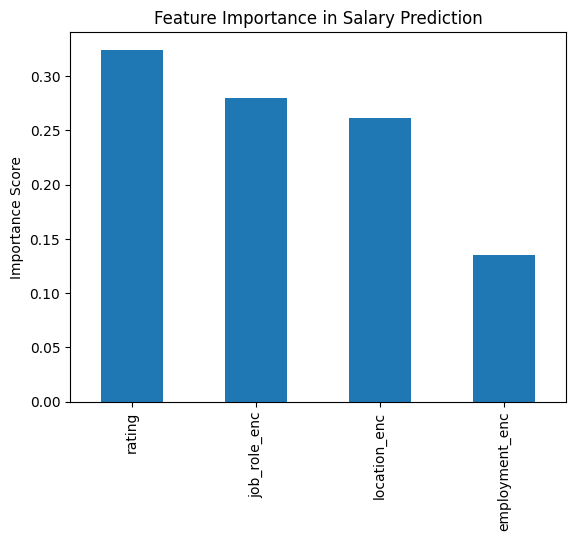

In [27]:
importance.plot(kind='bar')
plt.title("Feature Importance in Salary Prediction")
plt.ylabel("Importance Score")
plt.show()


In [28]:
df.groupby(['job_roles', 'location'])['salary'].median().head(10)


job_roles  location 
Android    Bangalore     500000.0
           Chennai       400000.0
           Hyderabad     400000.0
           New Delhi     400000.0
           Pune          300000.0
Backend    Bangalore     700000.0
           Chennai       378000.0
           Hyderabad     414000.0
           Mumbai       1100000.0
           New Delhi     400000.0
Name: salary, dtype: float64

In [29]:
# Compensation is role-driven, not rating-driven

# Location contributes disproportionately to salary

# Pay standardization could reduce bias and improve retention